In [1]:
import georef2
import numpy as np
import pyexiv2
import os
import matplotlib.pyplot as plt

In [2]:
# populate map
ORIGIN_PATH = "DJI_202508081433_021_PineIslandbog5H3m5x3photo/DJI_20250808143604_0001_D_Waypoint1.JPG"
IMG_DIR = "DJI_202508081433_021_PineIslandbog5H3m5x3photo"
LABEL_DIR = "output"
all_detections_coor = []

path_list = sorted(os.listdir("output"))
label_list = []
img_list = []

for i in range(len(path_list)): 
    if path_list[i][-3:] == 'txt':
        label_list.append(path_list[i])
    elif path_list[i][-3:] == 'JPG':
        img_list.append(path_list[i])
    else:
        pass

for i in range(len(label_list)):
    img_path = os.path.join(IMG_DIR, img_list[i])
    label_path = os.path.join(LABEL_DIR, label_list[i])
    mapped_list = georef2.georef(ORIGIN_PATH, img_path, label_path)
    all_detections_coor.extend(mapped_list)

pitch: -1.0471975511965976
altitude: 3.026
yaw: 0.2426007660272119
img width:  5280.0
img height:  3956.0
pitch: -1.0471975511965976
altitude: 2.9859999999999998
yaw: 0.2426007660272119
img width:  5280.0
img height:  3956.0
pitch: -1.0471975511965976
altitude: 2.987
yaw: 0.24085543677521742
img width:  5280.0
img height:  3956.0
pitch: -1.0471975511965976
altitude: 2.991
yaw: 0.24609142453120036
img width:  5280.0
img height:  3956.0
pitch: -1.0471975511965976
altitude: 2.989
yaw: 0.2426007660272119
img width:  5280.0
img height:  3956.0
pitch: -1.0471975511965976
altitude: 2.998
yaw: 0.2426007660272119
img width:  5280.0
img height:  3956.0
pitch: -1.0471975511965976
altitude: 3.014
yaw: 0.2426007660272119
img width:  5280.0
img height:  3956.0
pitch: -1.0471975511965976
altitude: 2.989
yaw: 0.2426007660272119
img width:  5280.0
img height:  3956.0
pitch: -1.0471975511965976
altitude: 2.999
yaw: 0.24783675378319484
img width:  5280.0
img height:  3956.0
pitch: -1.0471975511965976
alt

In [3]:
detection_coor = georef2.get_detections_coor("DJI_202508081433_021_PineIslandbog5H3m5x3photo/DJI_20250808143611_0002_D_Waypoint2.JPG", "output/DJI_20250808143611_0002_D_Waypoint2.txt")
print(detection_coor)

pitch: -1.0471975511965976
altitude: 3.026
yaw: 0.2426007660272119
img width:  5280.0
img height:  3956.0
[[-2.78895164  4.10134514]
 [-3.05953749  3.6566843 ]
 [-2.87805439  4.64405495]
 ...
 [ 1.91073994  0.49592349]
 [ 1.93619726  0.44711924]
 [ 1.75631479  0.33577143]]


In [4]:
corners = georef2.get_image_corners(ORIGIN_PATH, "DJI_202508081433_021_PineIslandbog5H3m5x3photo/DJI_20250808143611_0002_D_Waypoint2.JPG")
print(corners)

img width:  5280.0
img height:  3956.0
[[np.float64(-3.7013454588912813), np.float64(7.820136247540542)], [np.float64(3.261208792716473), np.float64(7.820136247540542)], [np.float64(1.6503046293940935), np.float64(3.1938884281687523)], [np.float64(-2.0904412955689016), np.float64(3.1938884281687523)]]


x_max: 3.3054982496233647
x_min: -3.363990244447583
y_max: 4.741401587653895
y_min: 0.1327700654973745
plot bound: 5.215541746419285


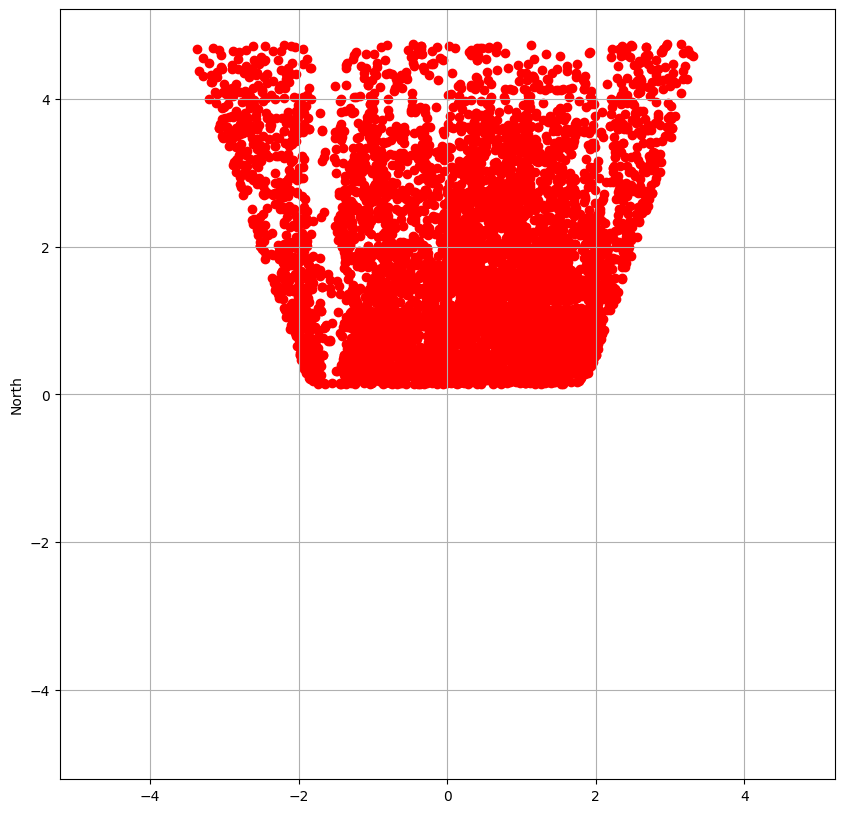

In [5]:
x_s = np.array([])
y_s = np.array([])
x_s = detection_coor[:, 0]
y_s = detection_coor[:, 1]

print('x_max:', np.max(x_s))
print('x_min:', np.min(x_s))

print('y_max:', np.max(y_s))
print('y_min:', np.min(y_s))

if np.max(x_s) <= -1*np.min(x_s):
    x_bound = -1*np.min(x_s)
else:
    x_bound = np.max(x_s)
if np.max(y_s) <= -1*np.min(y_s):
    y_bound = -1*np.min(y_s)
else:
    y_bound = np.max(y_s)

if x_bound < y_bound:
    bound = y_bound
else:
    bound = x_bound

bound = bound + bound*0.1
print("plot bound:", bound)

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(-bound, bound)
ax.set_ylim(-bound, bound)
plt.ylabel("North")
ax.grid(True)
ax.scatter(x_s, y_s, color='red', marker='o')
plt.show()


x_max: 6.292158283566668
x_min: -31.891164173498712
y_max: 133.07483254901518
y_min: 3.202057389697287
bound: 146.3823158039167


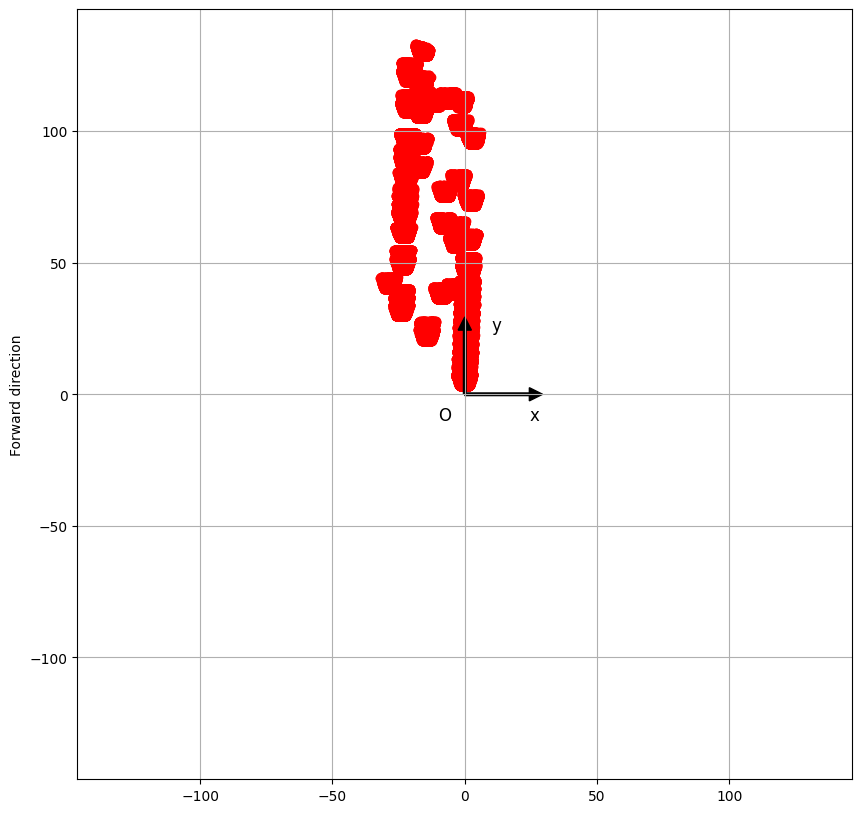

In [6]:
x_s = np.array([])
y_s = np.array([])


for i in range(len(all_detections_coor)):
    x_s = np.append(x_s, all_detections_coor[i][0])
    y_s = np.append(y_s, all_detections_coor[i][1])

print('x_max:', np.max(x_s))
print('x_min:', np.min(x_s))

print('y_max:', np.max(y_s))
print('y_min:', np.min(y_s))

if np.max(x_s) <= -1*np.min(x_s):
    x_bound = -1*np.min(x_s)
else:
    x_bound = np.max(x_s)
if np.max(y_s) <= -1*np.min(y_s):
    y_bound = -1*np.min(y_s)
else:
    y_bound = np.max(y_s)

if x_bound < y_bound:
    bound = y_bound
else:
    bound = x_bound

bound = bound + bound*0.1
print("bound:", bound)

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(-bound, bound)
ax.set_ylim(-bound, bound)
plt.ylabel("Forward direction")
ax.grid(True)

ax.scatter(x_s, y_s, color='red', marker='o')

# y-axis
ax.arrow(0, 0, 0, bound/6, width=1, head_width=5, head_length=5, fc='black', ec='black')
plt.text(10, bound/6, "y", color='black', fontsize='12')

# x-axis
ax.arrow(0, 0, bound/6, 0, width= 1, head_width=5, head_length=5, fc='black', ec='black')
plt.text(bound/6, -10, "x", color='black', fontsize='12')

plt.text(-10, -10, "O", color='black', fontsize=12)
plt.show()